## Table of contents
- [Introduction](#intro)
- [Importing modules and data](#mod)
- [Data investigation (high level)](#investigate)
- [Data cleaning (high level)](#clean)
- [Creating new features](#new_features)
- [Exploratory data analysis](#eda)
- [Predictive Modelling (Regression)](#model)
- [Predictive Modelling (Classification)](#infer)

<a id='intro'></a>
## Introduction
This project is to explore two things in general:
1. HDB resale price data - exploratory data analysis (EDA) on the dataset to find insights.
2. Modelling to predict HDB resale price as well as a classification model to infer flat type.

The purpose of this project is mainly for myself to explore regression models and also classification models. 

The dataset for this case study was sourced from [data.gov.sg](https://data.gov.sg/dataset/resale-flat-prices) and includes data for the years below:
- 1990-1999
- 2000-Feb 2012
- Mar 2012-Dec 2014
- Jan 2015-Dec 2016
- Jan 2017 onwards

<a id='mod'></a>
## Importing modules and data

In [1]:
import numpy as np
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Show non-truncated column
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', 100)

# Show full figures
pd.set_option('float_format', '{:.2f}'.format)

In [3]:
# load data from 1990-1999
df1 = pd.read_csv('resale-flat-prices/resale-flat-prices-based-on-approval-date-1990-1999.csv')
df1.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.00,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.00,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.00,IMPROVED,1977,8000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.00,IMPROVED,1977,6000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.00,NEW GENERATION,1976,47200


In [4]:
# load data from 2000-Feb 2012
df2 = pd.read_csv('resale-flat-prices/resale-flat-prices-based-on-approval-date-2000-feb-2012.csv')
df2.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.00,Improved,1986,147000.00
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.00,Improved,1986,144000.00
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.00,New Generation,1976,159000.00
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.00,New Generation,1976,167000.00
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.00,New Generation,1976,163000.00


In [5]:
# load data from Mar 2012-Dec 2014
df3 = pd.read_csv('resale-flat-prices/resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv')
df3.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.00,Improved,1986,250000.00
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.00,Improved,1980,265000.00
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.00,New Generation,1980,315000.00
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.00,New Generation,1984,320000.00
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.00,New Generation,1980,321000.00


In [6]:
# load data from Jan 2015 - Dec 2016
df4 = pd.read_csv('resale-flat-prices/resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv')
df4.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.00,Improved,1986,70,255000.00
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.00,New Generation,1981,65,275000.00
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.00,New Generation,1980,64,285000.00
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.00,New Generation,1979,63,290000.00
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.00,New Generation,1980,64,290000.00


In [7]:
# load data from Jan 2017 onwards
df5 = pd.read_csv('resale-flat-prices/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv')
df5.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.00,Improved,1979,61 years 04 months,232000.00
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.00,New Generation,1978,60 years 07 months,250000.00
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.00,New Generation,1980,62 years 05 months,262000.00
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.00,New Generation,1980,62 years 01 month,265000.00
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.00,New Generation,1980,62 years 05 months,265000.00


In [8]:
# Drop remaining_lease column from df4 and df5
df4 = df4.drop(['remaining_lease'], axis=1)
df5 = df5.drop(['remaining_lease'], axis=1)

# Check info of both dataframe
print(df4.info())
print(df5.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37153 entries, 0 to 37152
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                37153 non-null  object 
 1   town                 37153 non-null  object 
 2   flat_type            37153 non-null  object 
 3   block                37153 non-null  object 
 4   street_name          37153 non-null  object 
 5   storey_range         37153 non-null  object 
 6   floor_area_sqm       37153 non-null  float64
 7   flat_model           37153 non-null  object 
 8   lease_commence_date  37153 non-null  int64  
 9   resale_price         37153 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 2.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125019 entries, 0 to 125018
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month 

**Notes:**
At this stage, I decided to drop the `remaining_lease` column from `df4` and `df5` although I think this can be a useful information; I will calculate this column later on after merging the 5 datasets into one.

In [9]:
# Checking expected number of rows after merging
total_rows = len(df1) + len(df2) + len(df3) + len(df4) + len(df5)
total_rows

871222

In [10]:
# Merge the five datasets into one
df = pd.concat([df1, df2, df3, df4, df5], axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 871222 entries, 0 to 125018
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                871222 non-null  object 
 1   town                 871222 non-null  object 
 2   flat_type            871222 non-null  object 
 3   block                871222 non-null  object 
 4   street_name          871222 non-null  object 
 5   storey_range         871222 non-null  object 
 6   floor_area_sqm       871222 non-null  float64
 7   flat_model           871222 non-null  object 
 8   lease_commence_date  871222 non-null  int64  
 9   resale_price         871222 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 73.1+ MB


In [11]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.00,IMPROVED,1977,9000.00
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.00,IMPROVED,1977,6000.00
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.00,IMPROVED,1977,8000.00
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.00,IMPROVED,1977,6000.00
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.00,NEW GENERATION,1976,47200.00


In [12]:
# Save merged dataset for ease of loading the next time
#df.to_pickle('hdb_masterdata_202204250930.pkl')

<a id='investigate'></a>
## Data investigation (high level)

In [13]:
# Create a copy dataframe
data = df.copy()

In [14]:
data.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 871222 entries, 0 to 125018
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                871222 non-null  object 
 1   town                 871222 non-null  object 
 2   flat_type            871222 non-null  object 
 3   block                871222 non-null  object 
 4   street_name          871222 non-null  object 
 5   storey_range         871222 non-null  object 
 6   floor_area_sqm       871222 non-null  float64
 7   flat_model           871222 non-null  object 
 8   lease_commence_date  871222 non-null  int64  
 9   resale_price         871222 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 73.1+ MB


In [16]:
data.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.00,IMPROVED,1977,9000.00
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.00,IMPROVED,1977,6000.00
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.00,IMPROVED,1977,8000.00
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.00,IMPROVED,1977,6000.00
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.00,NEW GENERATION,1976,47200.00


In [17]:
data['town'].value_counts()

TAMPINES           76337
YISHUN             66044
BEDOK              63854
JURONG WEST        63093
WOODLANDS          61221
ANG MO KIO         49890
HOUGANG            47783
BUKIT BATOK        41631
CHOA CHU KANG      35719
BUKIT MERAH        32284
PASIR RIS          31755
TOA PAYOH          29891
SENGKANG           28101
QUEENSTOWN         27364
GEYLANG            26852
CLEMENTI           26850
BUKIT PANJANG      25947
KALLANG/WHAMPOA    25428
JURONG EAST        23729
SERANGOON          21930
BISHAN             20422
PUNGGOL            16363
SEMBAWANG          11835
MARINE PARADE       7699
CENTRAL AREA        6736
BUKIT TIMAH         2400
LIM CHU KANG          64
Name: town, dtype: int64

In [18]:
data['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [19]:
data['storey_range'].value_counts().sort_index(False)

01 TO 03    176705
01 TO 05      2700
04 TO 06    219863
06 TO 10      2474
07 TO 09    198277
10 TO 12    168414
11 TO 15      1259
13 TO 15     56673
16 TO 18     21664
16 TO 20       265
19 TO 21     10310
21 TO 25        92
22 TO 24      6705
25 TO 27      2946
26 TO 30        39
28 TO 30      1298
31 TO 33       441
31 TO 35         2
34 TO 36       409
36 TO 40         7
37 TO 39       385
40 TO 42       198
43 TO 45        44
46 TO 48        39
49 TO 51        13
Name: storey_range, dtype: int64

In [20]:
data['floor_area_sqm'].value_counts()

67.00     66045
104.00    45373
68.00     37012
84.00     34871
121.00    28234
          ...  
74.90         1
206.00        1
75.90         1
69.20         1
152.40        1
Name: floor_area_sqm, Length: 209, dtype: int64

In [21]:
data['flat_model'].value_counts().sort_index(False)

2-ROOM                        21
2-room                        35
APARTMENT                   9901
Adjoined flat               1159
Apartment                  23832
DBSS                        2647
IMPROVED                   73589
IMPROVED-MAISONETTE           44
Improved                  154891
Improved-Maisonette           74
MAISONETTE                 12215
MODEL A                    70381
MODEL A-MAISONETTE           982
MULTI GENERATION             279
Maisonette                 16070
Model A                   172941
Model A-Maisonette           995
Model A2                    9529
Multi Generation             250
NEW GENERATION             78898
New Generation            103671
PREMIUM APARTMENT              6
Premium Apartment          40778
Premium Apartment Loft        86
Premium Maisonette            85
SIMPLIFIED                 23258
STANDARD                   17375
Simplified                 32225
Standard                   23779
TERRACE                      247
Terrace   

**Notes:**
- Convert `month` to datetime datatype
- Convert all values in `flat_type` to lower case
- `flat_type` value of `MULTI GENERATION` and `MULTI-GENERATION` should be the same; convert all applicable values to `multi generation`
- Standardize `storey_range` as there are overlap values (e.g. 01 to 03 vs 01 to 05); one way to do this is by taking the "average" storey between the minimum and maximum storey range.
- Standardize `flat_model` values by converting everything to lower case as there are duplicate values due to upper vs lower case.
- The dataset is generally clean given that there are no missing values for this particular dataset.

<a id = clean></a>
## Data cleaning (high level)

### Convert `month` to datetime datatype

In [22]:
# Convert month column to datetime
data['month'] = pd.to_datetime(data['month'], format='%Y-%m')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 871222 entries, 0 to 125018
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                871222 non-null  datetime64[ns]
 1   town                 871222 non-null  object        
 2   flat_type            871222 non-null  object        
 3   block                871222 non-null  object        
 4   street_name          871222 non-null  object        
 5   storey_range         871222 non-null  object        
 6   floor_area_sqm       871222 non-null  float64       
 7   flat_model           871222 non-null  object        
 8   lease_commence_date  871222 non-null  int64         
 9   resale_price         871222 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 73.1+ MB


In [23]:
data.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.00,IMPROVED,1977,9000.00
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.00,IMPROVED,1977,6000.00
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.00,IMPROVED,1977,8000.00
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.00,IMPROVED,1977,6000.00
4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.00,NEW GENERATION,1976,47200.00


### Convert values in `flat_type` to lower case and standardize `multi generation`

In [24]:
# Convert all values in flat_type to lower case
data['flat_type'] = data['flat_type'].str.lower()
data['flat_type'].unique()

array(['1 room', '3 room', '4 room', '5 room', '2 room', 'executive',
       'multi generation', 'multi-generation'], dtype=object)

In [25]:
# Standardize flat_type values of multi generation
data.loc[data['flat_type'] == 'multi-generation', 'flat_type'] = 'multi generation'

# Check results of standardization
data['flat_type'].unique()

array(['1 room', '3 room', '4 room', '5 room', '2 room', 'executive',
       'multi generation'], dtype=object)

### Standardize `storey_range` with a new column

In [26]:
# Define function to calculate "average" storey in storey_range
def average_storey(x):
    return (int(x[:2]) + int(x[-2:])) / 2

In [27]:
data['storey'] = data['storey_range'].map(lambda x: average_storey(x))
data.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,storey
0,1990-01-01,ANG MO KIO,1 room,309,ANG MO KIO AVE 1,10 TO 12,31.00,IMPROVED,1977,9000.00,11.00
1,1990-01-01,ANG MO KIO,1 room,309,ANG MO KIO AVE 1,04 TO 06,31.00,IMPROVED,1977,6000.00,5.00
2,1990-01-01,ANG MO KIO,1 room,309,ANG MO KIO AVE 1,10 TO 12,31.00,IMPROVED,1977,8000.00,11.00
3,1990-01-01,ANG MO KIO,1 room,309,ANG MO KIO AVE 1,07 TO 09,31.00,IMPROVED,1977,6000.00,8.00
4,1990-01-01,ANG MO KIO,3 room,216,ANG MO KIO AVE 1,04 TO 06,73.00,NEW GENERATION,1976,47200.00,5.00


In [28]:
data['storey'].value_counts()

5.00     219863
8.00     200751
2.00     176705
11.00    168414
14.00     56673
17.00     21664
20.00     10310
23.00      6797
26.00      2946
3.00       2700
29.00      1298
13.00      1259
32.00       441
35.00       409
38.00       392
18.00       265
41.00       198
44.00        44
47.00        39
28.00        39
50.00        13
33.00         2
Name: storey, dtype: int64

### Convert values in `flat_model` to lower case

In [29]:
# Convert flat_model values to lowercase
data['flat_model'] = data['flat_model'].str.lower()
data['flat_model'].value_counts().sort_index(False)

2-room                        56
adjoined flat               1159
apartment                  33733
dbss                        2647
improved                  228480
improved-maisonette          118
maisonette                 28285
model a                   243322
model a-maisonette          1977
model a2                    9529
multi generation             529
new generation            182569
premium apartment          40784
premium apartment loft        86
premium maisonette            85
simplified                 55483
standard                   41154
terrace                      670
type s1                      366
type s2                      190
Name: flat_model, dtype: int64

<a id = new_features></a>
## Creating new features

In [30]:
data.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,storey
0,1990-01-01,ANG MO KIO,1 room,309,ANG MO KIO AVE 1,10 TO 12,31.00,improved,1977,9000.00,11.00
1,1990-01-01,ANG MO KIO,1 room,309,ANG MO KIO AVE 1,04 TO 06,31.00,improved,1977,6000.00,5.00
2,1990-01-01,ANG MO KIO,1 room,309,ANG MO KIO AVE 1,10 TO 12,31.00,improved,1977,8000.00,11.00
3,1990-01-01,ANG MO KIO,1 room,309,ANG MO KIO AVE 1,07 TO 09,31.00,improved,1977,6000.00,8.00
4,1990-01-01,ANG MO KIO,3 room,216,ANG MO KIO AVE 1,04 TO 06,73.00,new generation,1976,47200.00,5.00


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 871222 entries, 0 to 125018
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                871222 non-null  datetime64[ns]
 1   town                 871222 non-null  object        
 2   flat_type            871222 non-null  object        
 3   block                871222 non-null  object        
 4   street_name          871222 non-null  object        
 5   storey_range         871222 non-null  object        
 6   floor_area_sqm       871222 non-null  float64       
 7   flat_model           871222 non-null  object        
 8   lease_commence_date  871222 non-null  int64         
 9   resale_price         871222 non-null  float64       
 10  storey               871222 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 79.8+ MB


In [32]:
# Creating a transaction month and year from `month` column (basically separating the month and the year)
data['transaction_mth'] = data['month'].dt.month
data['transaction_yr'] = data['month'].dt.year

In [33]:
# Creating remaining_lease and flat_age columns
# I assume all HDB flats have 99 year leasehold
data['remaining_lease'] = np.where(data['lease_commence_date']+99-data['transaction_yr'] >99, 99, 
                                   data['lease_commence_date']+99-data['transaction_yr'])

# flat_age is the inverse of remaining lease
data['flat_age'] = 99-data['remaining_lease']

# Check results
data.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,storey,transaction_mth,transaction_yr,remaining_lease,flat_age
0,1990-01-01,ANG MO KIO,1 room,309,ANG MO KIO AVE 1,10 TO 12,31.00,improved,1977,9000.00,11.00,1,1990,86,13
1,1990-01-01,ANG MO KIO,1 room,309,ANG MO KIO AVE 1,04 TO 06,31.00,improved,1977,6000.00,5.00,1,1990,86,13
2,1990-01-01,ANG MO KIO,1 room,309,ANG MO KIO AVE 1,10 TO 12,31.00,improved,1977,8000.00,11.00,1,1990,86,13
3,1990-01-01,ANG MO KIO,1 room,309,ANG MO KIO AVE 1,07 TO 09,31.00,improved,1977,6000.00,8.00,1,1990,86,13
4,1990-01-01,ANG MO KIO,3 room,216,ANG MO KIO AVE 1,04 TO 06,73.00,new generation,1976,47200.00,5.00,1,1990,85,14


In [34]:
data['remaining_lease'].value_counts()

94    46728
95    46478
93    35680
86    34082
85    34031
89    33255
88    33173
87    32951
90    31434
84    31185
92    30059
83    29613
91    29552
82    28862
81    28100
80    27132
79    27079
78    25942
77    23878
76    22547
75    20841
74    19768
73    17841
72    16626
71    15684
70    14639
69    13715
68    13175
67    12567
66    11869
65    10754
64     9355
96     9088
63     8608
62     7185
61     5886
60     5005
59     4619
58     4243
57     3669
56     3208
55     2335
54     1814
53     1468
52     1185
51      890
50      694
49      593
97      533
48      506
47      367
98      211
46      194
99      151
45      137
44       38
Name: remaining_lease, dtype: int64

In [35]:
# Setting up new column to calculate average price per square meters
data['averagepx_sqm'] = data['resale_price'] / data['floor_area_sqm']

In [36]:
data.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,storey,transaction_mth,transaction_yr,remaining_lease,flat_age,averagepx_sqm
0,1990-01-01,ANG MO KIO,1 room,309,ANG MO KIO AVE 1,10 TO 12,31.00,improved,1977,9000.00,11.00,1,1990,86,13,290.32
1,1990-01-01,ANG MO KIO,1 room,309,ANG MO KIO AVE 1,04 TO 06,31.00,improved,1977,6000.00,5.00,1,1990,86,13,193.55
2,1990-01-01,ANG MO KIO,1 room,309,ANG MO KIO AVE 1,10 TO 12,31.00,improved,1977,8000.00,11.00,1,1990,86,13,258.06
3,1990-01-01,ANG MO KIO,1 room,309,ANG MO KIO AVE 1,07 TO 09,31.00,improved,1977,6000.00,8.00,1,1990,86,13,193.55
4,1990-01-01,ANG MO KIO,3 room,216,ANG MO KIO AVE 1,04 TO 06,73.00,new generation,1976,47200.00,5.00,1,1990,85,14,646.58


In [37]:
# Saving cleaned data into new dataframe
data_clean = data.copy()

# Saving cleaned data into new file for ease of loading
#data_clean.to_pickle('hdb_masterdata_cleaned_202204251130.pkl')

<a id = eda></a>
## Exploratory Data Analysis (EDA)

In [38]:
# Setting the default chart size
plt.rcParams['figure.figsize'] = (15,8)

# Setting the seaborn color palette
flare = 'flare'

# Setting the seaborn style
sns.set_style('darkgrid')

### Exploring `town`

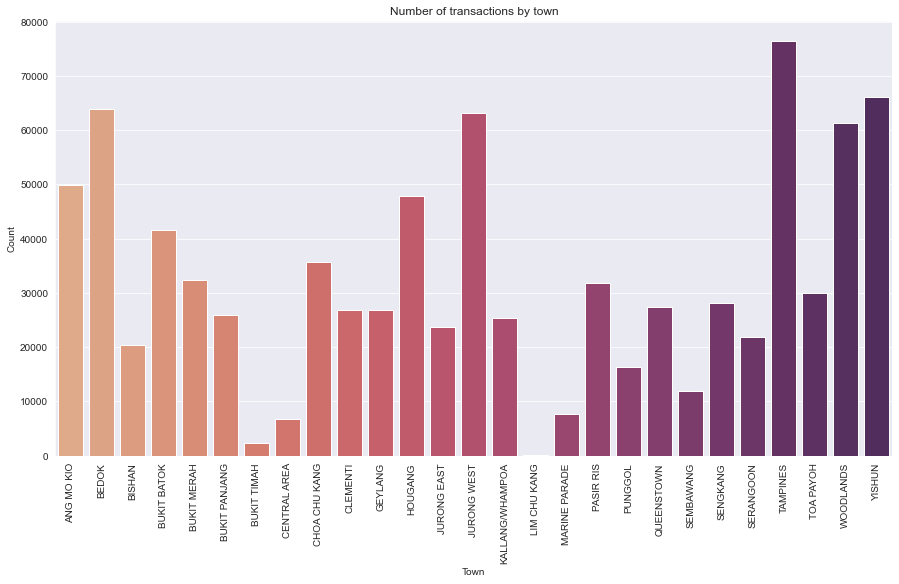

In [39]:
town = np.unique(data_clean['town'])

sns.countplot(data = data_clean, x='town', palette=flare, order=town)
plt.xticks(rotation=90)
plt.xlabel('Town')
plt.ylabel('Count')
plt.title('Number of transactions by town')
plt.show()

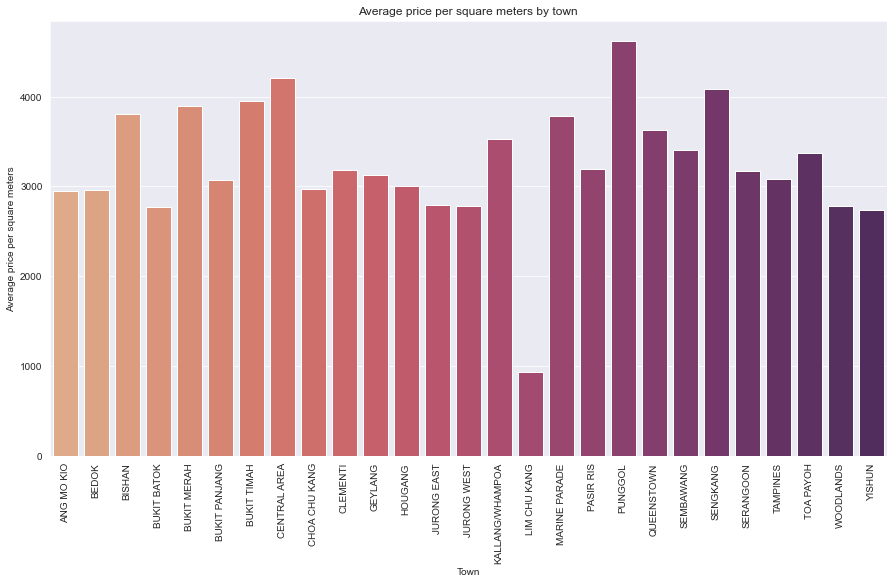

In [40]:
n = len(town)
avg_price = np.zeros(n)

for i in range(0,n):
    avg_price[i] = data_clean['averagepx_sqm'][data_clean['town'] == town[i]].mean()

sns.barplot(x=town, y=avg_price, palette=flare, order=town)
plt.xlabel('Town')
plt.ylabel('Average price per square meters')
plt.xticks(rotation=90)
plt.title('Average price per square meters by town')
plt.show()

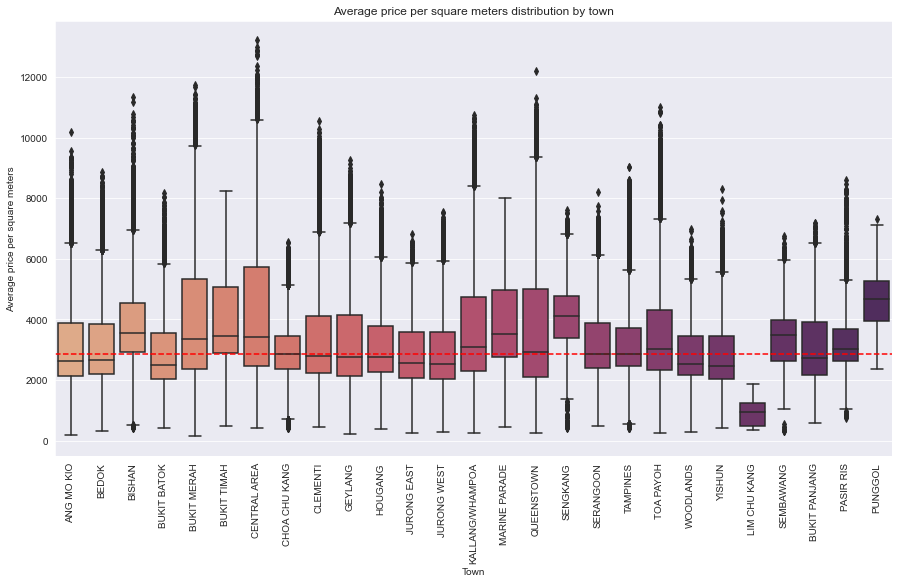

In [41]:
sns.boxplot(data=data_clean, x = 'town', y = 'averagepx_sqm', palette=flare)
plt.axhline(y=data_clean['averagepx_sqm'].median(), linestyle = '--', color='r')
plt.xlabel('Town')
plt.ylabel('Average price per square meters')
plt.title('Average price per square meters distribution by town')
plt.xticks(rotation=90)
plt.show()

In [42]:
overall_avgpx = data_clean['averagepx_sqm'].mean()

avg_by_town = data_clean.groupby('town')['averagepx_sqm'].mean()
avg_by_town = avg_by_town.reset_index(name='averagepx_sqm')

higher_than_avg = avg_by_town[avg_by_town['averagepx_sqm']>overall_avgpx]
higher_than_avg

,town,averagepx_sqm
2,BISHAN,3803.37
4,BUKIT MERAH,3891.72
6,BUKIT TIMAH,3954.39
7,CENTRAL AREA,4204.46
9,CLEMENTI,3183.81
14,KALLANG/WHAMPOA,3528.57
16,MARINE PARADE,3781.93
17,PASIR RIS,3194.39
18,PUNGGOL,4614.20
19,QUEENSTOWN,3622.86


**Notes:**
- 14 towns out of 27 had average resale price per square meters that are higher than the overall average (S$ 3,142/sqm).
- Punggol has the highest average resale price per square meters, despite having one of the lowest transaction frequencies.
- Tampines, Yishun, and Bedok are the top three towns with highest transaction frequencies.

### Exploring `flat_type`

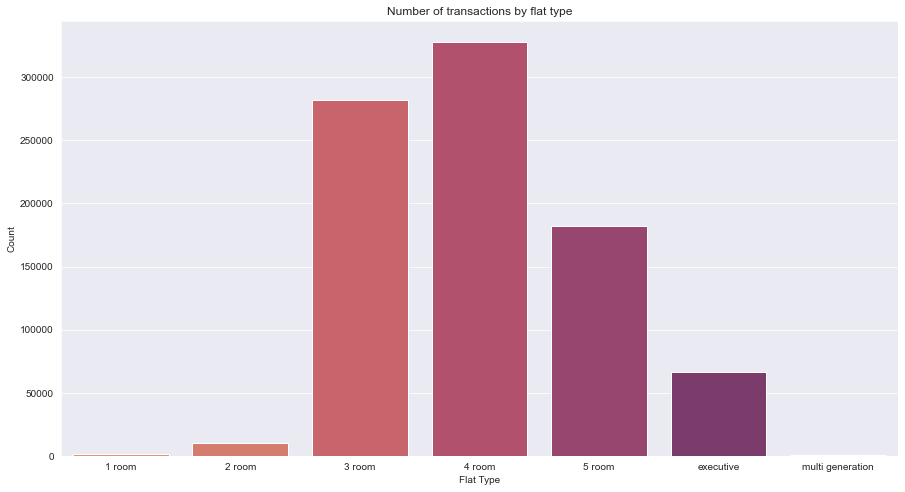

In [43]:
flattype = np.unique(data_clean['flat_type'])

sns.countplot(data = data_clean, x='flat_type', palette=flare, order=flattype)
plt.xlabel('Flat Type')
plt.ylabel('Count')
plt.title('Number of transactions by flat type')
plt.show()

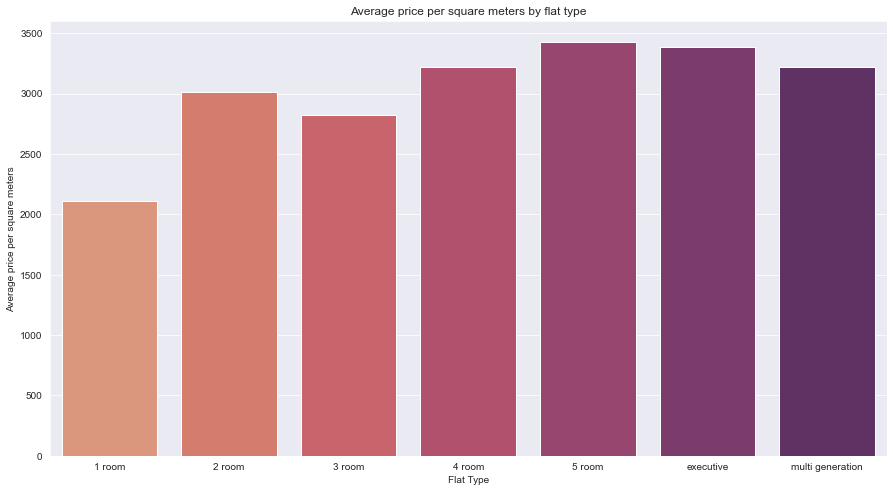

In [44]:
n = len(flattype)
avg_price = np.zeros(n)

for i in range(0,n):
    avg_price[i] = data_clean['averagepx_sqm'][data_clean['flat_type'] == flattype[i]].mean()

sns.barplot(x=flattype, y=avg_price, palette=flare, order=flattype)
plt.xlabel('Flat Type')
plt.ylabel('Average price per square meters')
plt.title('Average price per square meters by flat type')
plt.show()

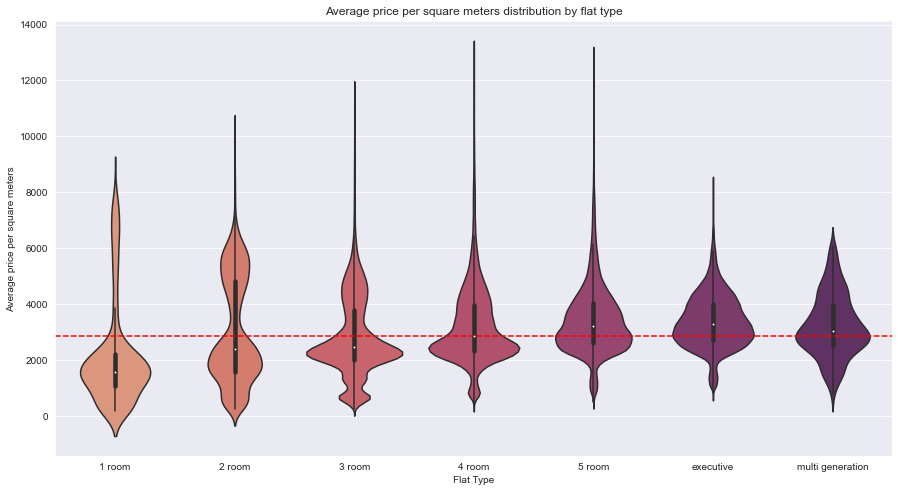

In [45]:
sns.violinplot(data=data_clean, x = 'flat_type', y = 'averagepx_sqm', palette=flare, order=flattype)
plt.axhline(y=data_clean['averagepx_sqm'].median(), linestyle = '--', color='r')
plt.xlabel('Flat Type')
plt.ylabel('Average price per square meters')
plt.title('Average price per square meters distribution by flat type')
plt.show()

In [46]:
avg_by_ftype = data_clean.groupby('flat_type')['averagepx_sqm'].mean()
avg_by_ftype = avg_by_ftype.reset_index(name='averagepx_sqm')
avg_by_ftype

,flat_type,averagepx_sqm
0,1 room,2107.97
1,2 room,3016.06
2,3 room,2821.69
3,4 room,3218.36
4,5 room,3431.08
5,executive,3385.31
6,multi generation,3224.61


**Notes:**
- Most of the transactions in the past are for 3-, 4- and 5-rooms flat with some Executive flats; 1 room and multi generation has the least transaction frequencies.
- It is no surprise to observe that average resale price per square meters to go up with increasing number of rooms; 5-rooms flats have the highest agerage resale price per square meters followed by Executive flats.
- For 2-room flats, it is interesting to observe that there is a wide range of average resale price per square meters with two concentrations at about S\\$ 2K/sqm and another at S\\$ 5K/sqm; this could be due to location (town) or other factors.

### Exploring `storey`

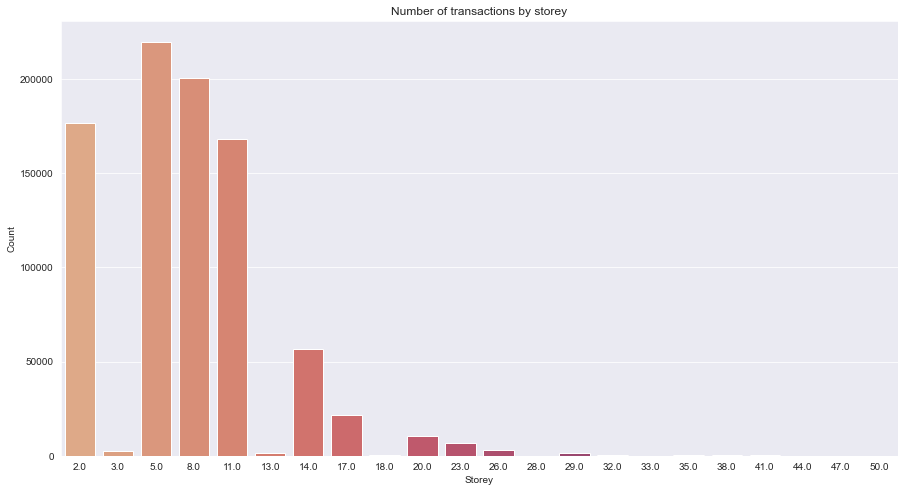

In [47]:
storey = np.unique(data_clean['storey'])
sns.countplot(data = data_clean, x='storey', palette=flare, order=storey)
plt.xlabel('Storey')
plt.ylabel('Count')
plt.title('Number of transactions by storey')
plt.show()

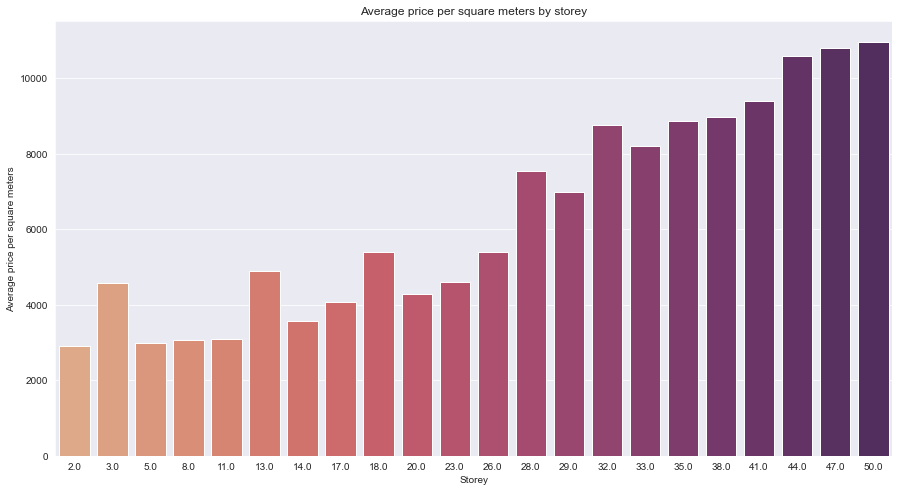

In [48]:
n = len(storey)
avg_price = np.zeros(n)

for i in range(0,n):
    avg_price[i] = data_clean['averagepx_sqm'][data_clean['storey'] == storey[i]].mean()
    
sns.barplot(x=storey, y=avg_price, palette=flare, order=storey)
plt.xlabel('Storey')
plt.ylabel('Average price per square meters')
plt.title('Average price per square meters by storey')
plt.show()

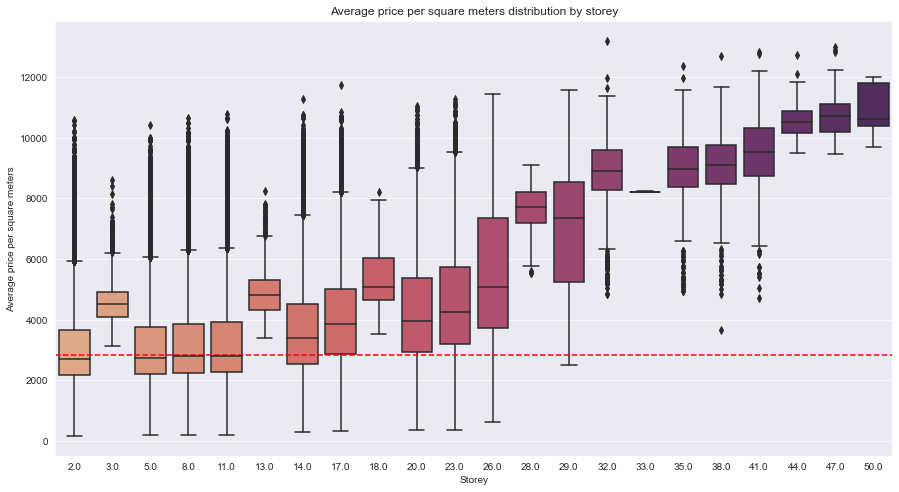

In [49]:
sns.boxplot(data=data_clean, x = 'storey', y = 'averagepx_sqm', palette=flare, order=storey)
plt.axhline(y=data_clean['averagepx_sqm'].median(), linestyle = '--', color='r')
plt.xlabel('Storey')
plt.ylabel('Average price per square meters')
plt.title('Average price per square meters distribution by storey')
plt.show()

**Notes:**
- Average resale price per square meters have an obvious upward trend i.e. prices tend to go up as we go further up the storey.
- We can observe spike in the average resale price per square meters in some of the storey such as from 2 to 3, 11 to 13 and etc; this is due to the way storey is tagged i.e. there was a change from `01 TO 03` to `01 to 05` where the latter would have captured a higher resale price given that the resale price included storey 4 and 5. 

### Exploring `floor_area_sqm`

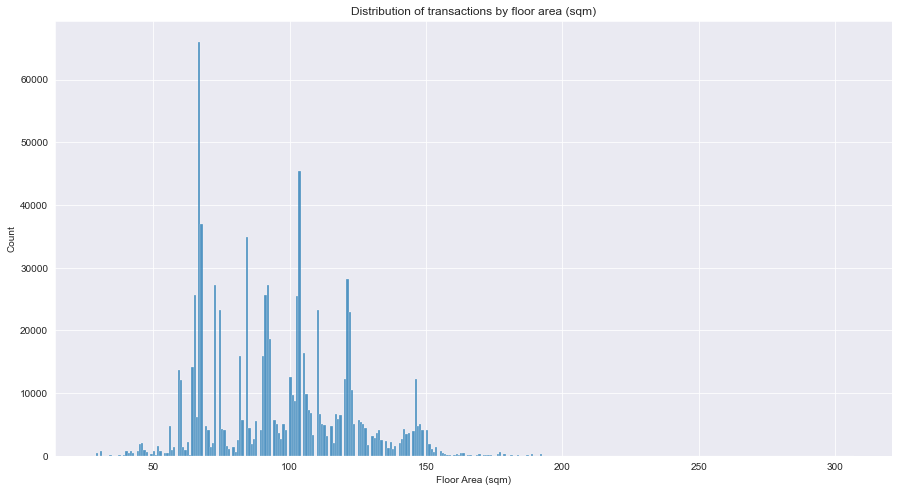

In [50]:
sns.histplot(data = data_clean, x=data_clean['floor_area_sqm'])
plt.xlabel('Floor Area (sqm)')
plt.title('Distribution of transactions by floor area (sqm)')
plt.show()

In [51]:
data_clean['floor_area_sqm'].describe()

count   871222.00
mean        95.69
std         25.95
min         28.00
25%         73.00
50%         93.00
75%        113.00
max        307.00
Name: floor_area_sqm, dtype: float64

In [52]:
data_clean['floor_area_sqm'].mode()

0   67.00
dtype: float64

**Notes:**
- Flats of 67 square meters have the highest transaction frequencies.
- On average, most flats transacted are about 96 square meters.

### Exploring `flat_model`

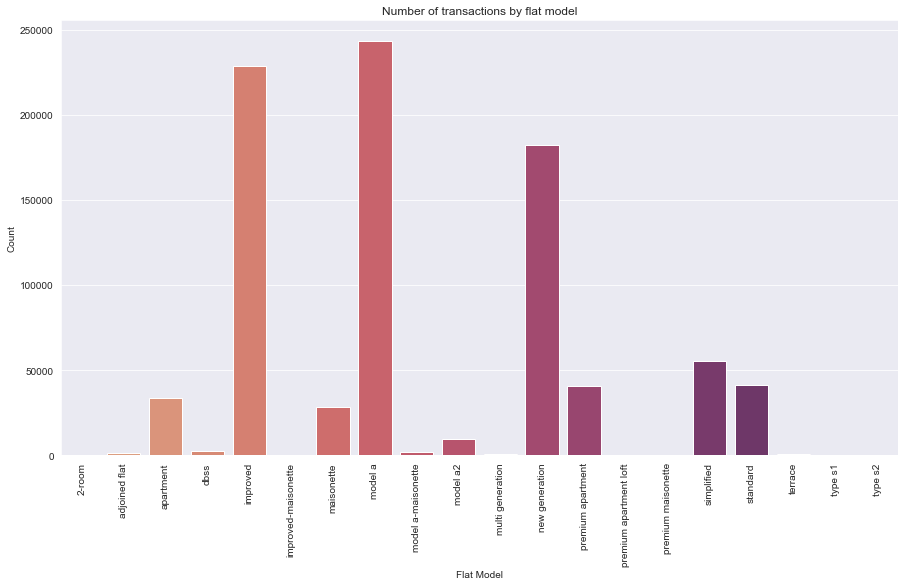

In [53]:
flatm = np.unique(data_clean['flat_model'])
sns.countplot(data = data_clean, x='flat_model', palette=flare, order=flatm)
plt.xlabel('Flat Model')
plt.ylabel('Count')
plt.title('Number of transactions by flat model')
plt.xticks(rotation=90)
plt.show()

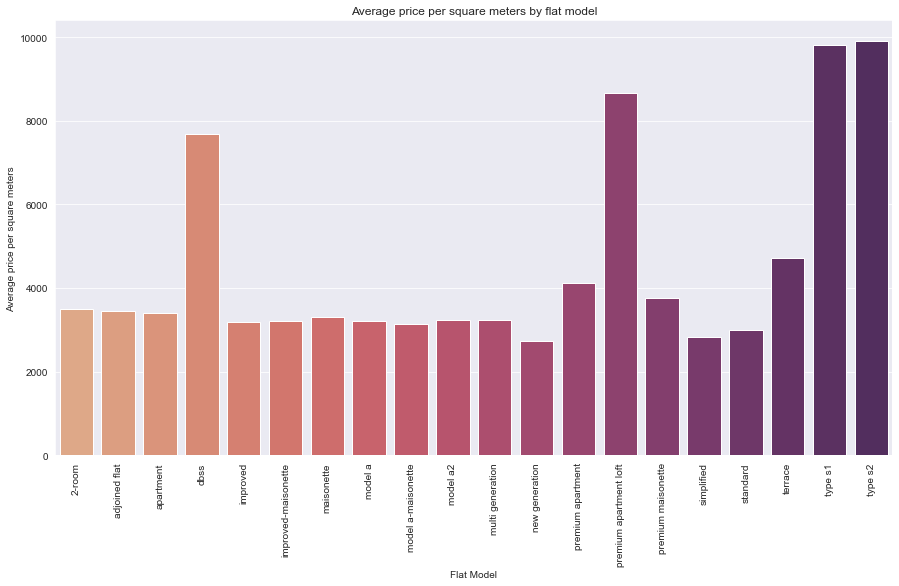

In [54]:
n = len(flatm)
avg_price = np.zeros(n)

for i in range(0,n):
    avg_price[i] = data_clean['averagepx_sqm'][data_clean['flat_model'] == flatm[i]].mean()
    
sns.barplot(x=flatm, y=avg_price, palette=flare, order=flatm)
plt.xlabel('Flat Model')
plt.ylabel('Average price per square meters')
plt.title('Average price per square meters by flat model')
plt.xticks(rotation=90)
plt.show()

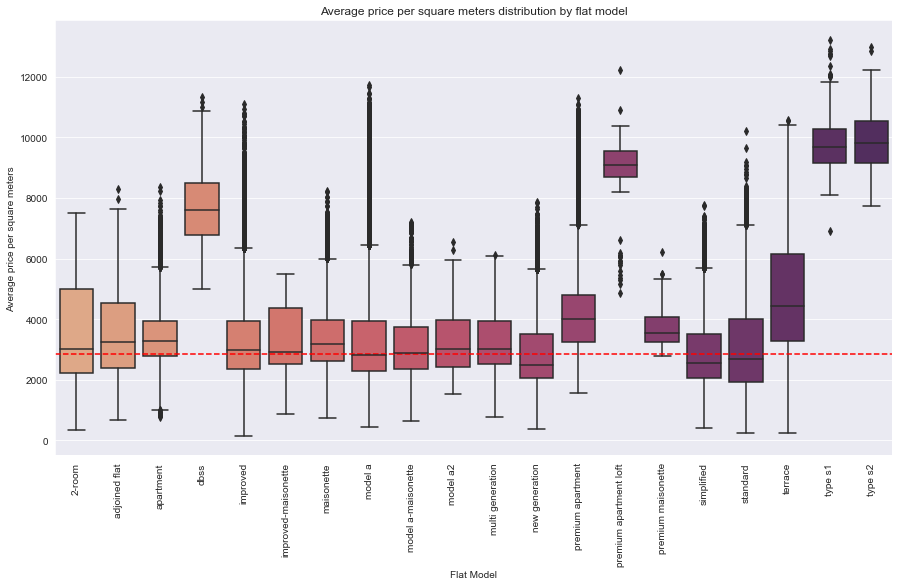

In [55]:
sns.boxplot(data=data_clean, x = 'flat_model', y = 'averagepx_sqm', palette=flare, order=flatm)
plt.axhline(y=data_clean['averagepx_sqm'].median(), linestyle = '--', color='r')
plt.xlabel('Flat Model')
plt.ylabel('Average price per square meters')
plt.title('Average price per square meters distribution by flat model')
plt.xticks(rotation=90)
plt.show()

In [56]:
data_clean['flat_model'].value_counts()

model a                   243322
improved                  228480
new generation            182569
simplified                 55483
standard                   41154
premium apartment          40784
apartment                  33733
maisonette                 28285
model a2                    9529
dbss                        2647
model a-maisonette          1977
adjoined flat               1159
terrace                      670
multi generation             529
type s1                      366
type s2                      190
improved-maisonette          118
premium apartment loft        86
premium maisonette            85
2-room                        56
Name: flat_model, dtype: int64

**Notes:**
- Type S1, Type S2 and premium apartment loft have among the lowest transaction frequencies but one of the highest average resale price per square meters among the flat models.
- Model A and Improved are two of the most transacted flats.

### Exploring `flat_age`

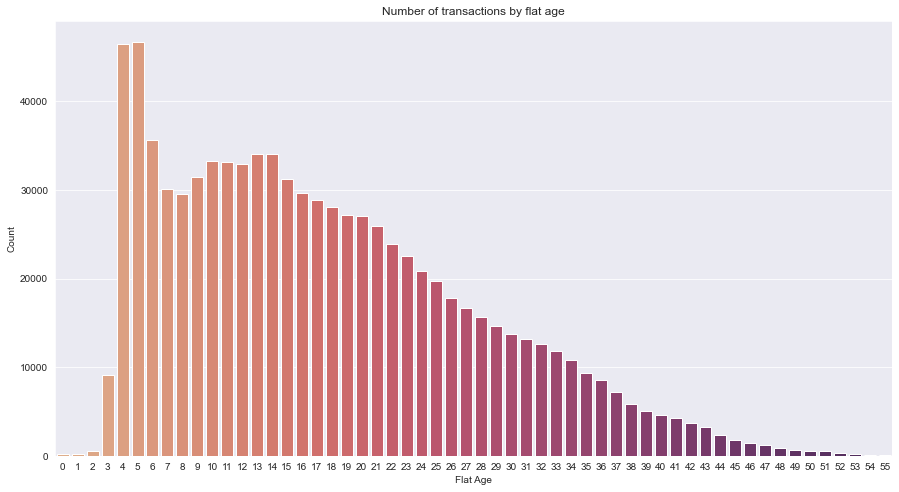

In [57]:
flata = np.unique(data_clean['flat_age'])
sns.countplot(data = data_clean, x='flat_age', palette=flare, order=flata)
plt.xlabel('Flat Age')
plt.ylabel('Count')
plt.title('Number of transactions by flat age')
plt.show()

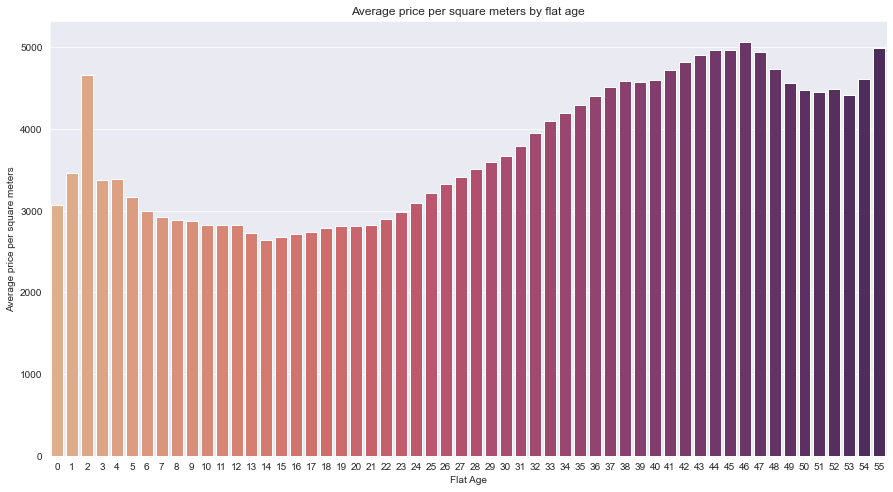

In [58]:
n = len(flata)
avg_price = np.zeros(n)

for i in range(0,n):
    avg_price[i] = data_clean['averagepx_sqm'][data_clean['flat_age'] == flata[i]].mean()
    
sns.barplot(x=flata, y=avg_price, palette=flare, order=flata)
plt.xlabel('Flat Age')
plt.ylabel('Average price per square meters')
plt.title('Average price per square meters by flat age')
plt.show()

**Notes:**
- "Older" flats have less transaction frequencies while we see the most transaction occurring for flats that are about 4 to 5 years of age; this can be due to residents meeting the Minimum Occupation Period (MOP) requirement and looking for a new place soon after.
- However, in terms of average resale price per square meters, we observe that there is a general upward trend as flats age i.e. average resale price per square meters tend to go up as flats age. This can be due to older flats may generally have an established neighborhood with necessary amenities and conveniences already built around the neighborhood thus increasing the resale price.

### Exploring `transaction_yr`

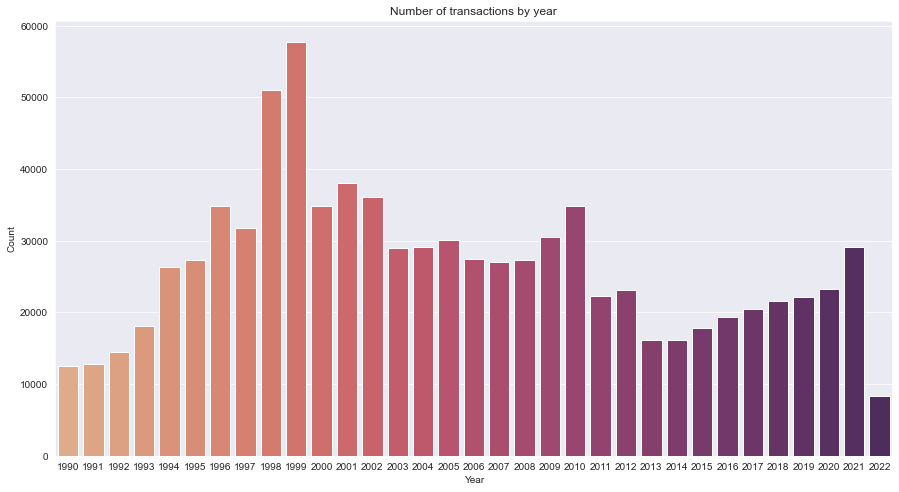

In [59]:
sns.countplot(data = data_clean, x='transaction_yr', palette=flare)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of transactions by year')
plt.show()

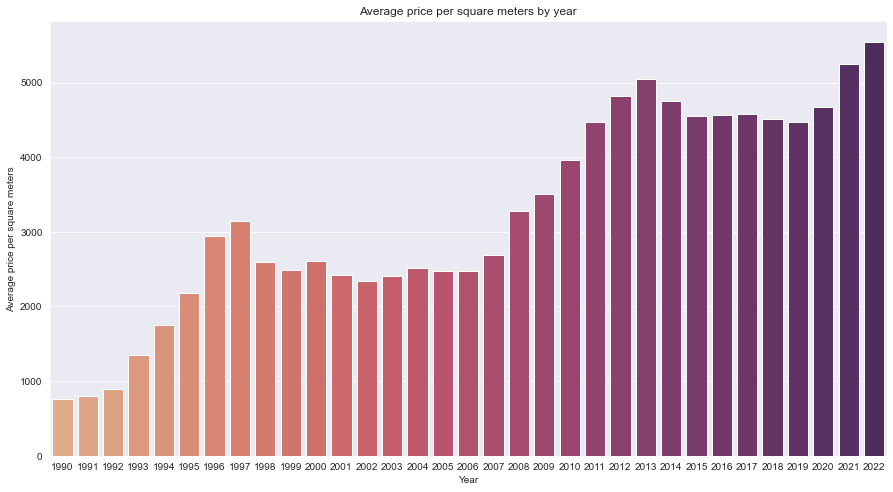

In [60]:
year = np.unique(data_clean['transaction_yr'])
n = len(year)
avg_price = np.zeros(n)

for i in range(0,n):
    avg_price[i] = data_clean['averagepx_sqm'][data_clean['transaction_yr'] == year[i]].mean()
    
sns.barplot(x=year, y=avg_price, palette=flare)
plt.xlabel('Year')
plt.ylabel('Average price per square meters')
plt.title('Average price per square meters by year')
plt.show()

**Notes:**
- We observe the highest number of transactions in 1998-1999 and a sharp drop in transactions after that.
- In fact, in terms of frequencies, there seem to be a decline in transactions over the years although it seems that there will be pick-up in number of transactions every decade or so.
- Average resale price per square meters show an obvious increasing trend with the steepest increase after 2008.

In [61]:
data_clean.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,storey,transaction_mth,transaction_yr,remaining_lease,flat_age,averagepx_sqm
0,1990-01-01,ANG MO KIO,1 room,309,ANG MO KIO AVE 1,10 TO 12,31.00,improved,1977,9000.00,11.00,1,1990,86,13,290.32
1,1990-01-01,ANG MO KIO,1 room,309,ANG MO KIO AVE 1,04 TO 06,31.00,improved,1977,6000.00,5.00,1,1990,86,13,193.55
2,1990-01-01,ANG MO KIO,1 room,309,ANG MO KIO AVE 1,10 TO 12,31.00,improved,1977,8000.00,11.00,1,1990,86,13,258.06
3,1990-01-01,ANG MO KIO,1 room,309,ANG MO KIO AVE 1,07 TO 09,31.00,improved,1977,6000.00,8.00,1,1990,86,13,193.55
4,1990-01-01,ANG MO KIO,3 room,216,ANG MO KIO AVE 1,04 TO 06,73.00,new generation,1976,47200.00,5.00,1,1990,85,14,646.58


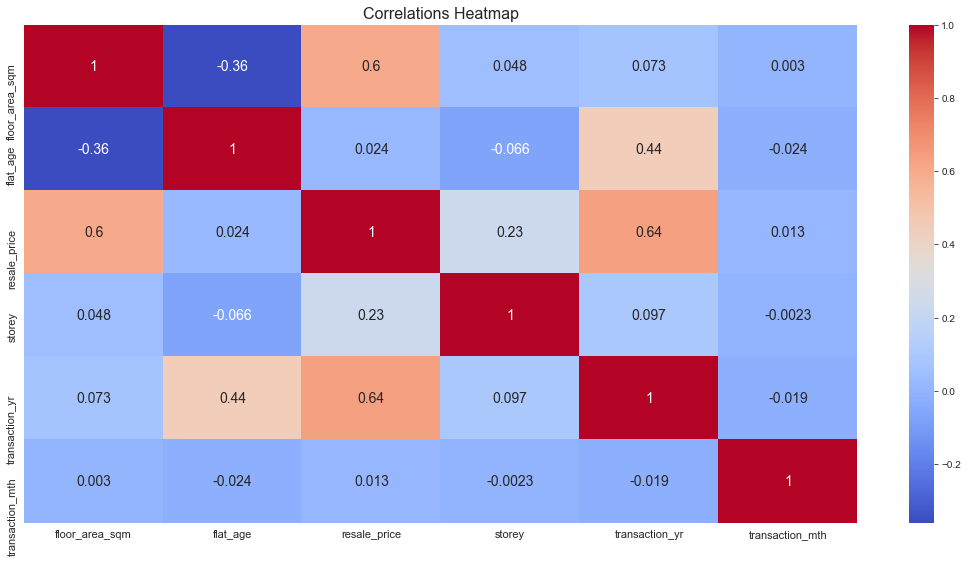

In [62]:
cor = data_clean.corr().loc[['floor_area_sqm', 'flat_age', 'resale_price', 'storey', 'transaction_yr', 'transaction_mth'], 
                    ['floor_area_sqm', 'flat_age', 'resale_price', 'storey', 'transaction_yr', 'transaction_mth']]

sns.heatmap(cor, annot = True, annot_kws={"fontsize":14}, cmap = 'coolwarm')
plt.title('Correlations Heatmap', fontsize = 16)
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)
plt.tight_layout()
plt.show()

**Notes:**
- The features most strongly correlate with `resale_price` are `floor_area_sqm` and `transaction_yr`.
- Interestingly, `flat_age` has a negative correlation with `floor_area_sqm` i.e. transacted older flats have smaller floor area in square meters.

<a id=model></a>
## Predictive Modelling (Regression)

In [63]:
# Creating a copy dataframe for encoding
data_enc = data_clean.copy()

In [64]:
data_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 871222 entries, 0 to 125018
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                871222 non-null  datetime64[ns]
 1   town                 871222 non-null  object        
 2   flat_type            871222 non-null  object        
 3   block                871222 non-null  object        
 4   street_name          871222 non-null  object        
 5   storey_range         871222 non-null  object        
 6   floor_area_sqm       871222 non-null  float64       
 7   flat_model           871222 non-null  object        
 8   lease_commence_date  871222 non-null  int64         
 9   resale_price         871222 non-null  float64       
 10  storey               871222 non-null  float64       
 11  transaction_mth      871222 non-null  int64         
 12  transaction_yr       871222 non-null  int64         
 13  remaining_leas

In [65]:
# Selecting only the relevant columns that will be used for regression
data_enc = data_enc[['transaction_yr','transaction_mth','town', 'flat_type', 'storey', 'floor_area_sqm', 'flat_model', 
                     'resale_price', 'flat_age']]
data_enc.head()

,transaction_yr,transaction_mth,town,flat_type,storey,floor_area_sqm,flat_model,resale_price,flat_age
0,1990,1,ANG MO KIO,1 room,11.00,31.00,improved,9000.00,13
1,1990,1,ANG MO KIO,1 room,5.00,31.00,improved,6000.00,13
2,1990,1,ANG MO KIO,1 room,11.00,31.00,improved,8000.00,13
3,1990,1,ANG MO KIO,1 room,8.00,31.00,improved,6000.00,13
4,1990,1,ANG MO KIO,3 room,5.00,73.00,new generation,47200.00,14


In [66]:
# Creating dummy variables with pandas get_dummies
col_list = ['town', 'flat_type', 'flat_model']

data_enc = pd.get_dummies(data=data_enc, columns=col_list)
data_enc.head()

,transaction_yr,transaction_mth,storey,floor_area_sqm,resale_price,flat_age,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,town_CENTRAL AREA,town_CHOA CHU KANG,town_CLEMENTI,town_GEYLANG,town_HOUGANG,town_JURONG EAST,town_JURONG WEST,town_KALLANG/WHAMPOA,town_LIM CHU KANG,town_MARINE PARADE,town_PASIR RIS,town_PUNGGOL,town_QUEENSTOWN,town_SEMBAWANG,town_SENGKANG,town_SERANGOON,town_TAMPINES,town_TOA PAYOH,town_WOODLANDS,town_YISHUN,flat_type_1 room,flat_type_2 room,flat_type_3 room,flat_type_4 room,flat_type_5 room,flat_type_executive,flat_type_multi generation,flat_model_2-room,flat_model_adjoined flat,flat_model_apartment,flat_model_dbss,flat_model_improved,flat_model_improved-maisonette,flat_model_maisonette,flat_model_model a,flat_model_model a-maisonette,flat_model_model a2,flat_model_multi generation,flat_model_new generation,flat_model_premium apartment,flat_model_premium apartment loft,flat_model_premium maisonette,flat_model_simplified,flat_model_standard,flat_model_terrace,flat_model_type s1,flat_model_type s2
0,1990,1,11.00,31.00,9000.00,13,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1990,1,5.00,31.00,6000.00,13,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1990,1,11.00,31.00,8000.00,13,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1990,1,8.00,31.00,6000.00,13,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1990,1,5.00,73.00,47200.00,14,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [67]:
data_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 871222 entries, 0 to 125018
Data columns (total 60 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   transaction_yr                     871222 non-null  int64  
 1   transaction_mth                    871222 non-null  int64  
 2   storey                             871222 non-null  float64
 3   floor_area_sqm                     871222 non-null  float64
 4   resale_price                       871222 non-null  float64
 5   flat_age                           871222 non-null  int64  
 6   town_ANG MO KIO                    871222 non-null  uint8  
 7   town_BEDOK                         871222 non-null  uint8  
 8   town_BISHAN                        871222 non-null  uint8  
 9   town_BUKIT BATOK                   871222 non-null  uint8  
 10  town_BUKIT MERAH                   871222 non-null  uint8  
 11  town_BUKIT PANJANG                 8712

### Importing the necessary modules

In [68]:
# Import the necessary machine learning modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from datetime import datetime as dt

In [69]:
# Splitting the dataset into training and testing set
target_var = data_enc['resale_price']
predict_var = data_enc.drop('resale_price', axis=1)

x_train, x_test, y_train, y_test = train_test_split(predict_var, target_var, test_size=0.2, random_state=0)

In [70]:
# Linear Regression model
start = dt.now()

model_linreg = LinearRegression()
model_linreg.fit(x_train, y_train)

y_pred_lin = model_linreg.predict(x_test)

running_secs_lin = (dt.now() - start).seconds
print('Total time it takes to run the model (seconds): {}' .format(running_secs_lin))
print('Total time it takes to run the model (minutes): {}' .format(running_secs_lin/60))

Total time it takes to run the model (seconds): 1
Total time it takes to run the model (minutes): 0.016666666666666666


In [71]:
# Getting scores for linear regression model
mae_linreg = mean_absolute_error(y_test, y_pred_lin)
mse_linreg = mean_squared_error(y_test, y_pred_lin)
r2_linreg = r2_score(y_test, y_pred_lin)
         
print('The mean absolute error for linear regression is: {:.0f}' .format(mae_linreg))
print('The mean squared error for linear regression is: {:.0f}' .format(mse_linreg))
print('The R2 for linear regression is: {:.2f}' .format(r2_linreg))

The mean absolute error for linear regression is: 50883
The mean squared error for linear regression is: 4388716910
The R2 for linear regression is: 0.82


In [72]:
# RandomForestRegressor model
start = dt.now()
model_forest = RandomForestRegressor(random_state=0)
model_forest.fit(x_train, y_train)

y_pred_forest = model_forest.predict(x_test)

running_secs_forest = (dt.now() - start).seconds
print('Total time it takes to run the model (seconds): {}' .format(running_secs_forest))
print('Total time it takes to run the model (minutes): {}' .format(running_secs_forest/60))

Total time it takes to run the model (seconds): 628
Total time it takes to run the model (minutes): 10.466666666666667


In [73]:
# Getting scores for random forest regressor model
mae_forest = mean_absolute_error(y_test, y_pred_forest)
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)
         
print('The mean absolute error for random forest regressor is: {:.0f}' .format(mae_forest))
print('The mean squared error for random forest regressor is: {:.0f}' .format(mse_forest))
print('The R2 for random forest regressor is: {:.2f}' .format(r2_forest))

The mean absolute error for random forest regressor is: 16479
The mean squared error for random forest regressor is: 596346119
The R2 for random forest regressor is: 0.98


In [74]:
# GradientBoostingRegressor model
start = dt.now()

model_gbr = GradientBoostingRegressor(random_state=0)
model_gbr.fit(x_train, y_train)

y_pred_gbr = model_gbr.predict(x_test)

running_secs_gbr = (dt.now() - start).seconds
print('Total time it takes to run the model (seconds): {}' .format(running_secs_gbr))
print('Total time it takes to run the model (minutes): {}' .format(running_secs_gbr/60))

Total time it takes to run the model (seconds): 160
Total time it takes to run the model (minutes): 2.6666666666666665


In [75]:
# Getting scores for gradient boosting regressor model
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)
         
print('The mean absolute error for gradient boosting regressor is: {:.0f}' .format(mae_gbr))
print('The mean squared error for gradient boosting regressor is: {:.0f}' .format(mse_gbr))
print('The R2 for gradient boosting regressor is: {:.2f}' .format(r2_gbr))

The mean absolute error for gradient boosting regressor is: 32188
The mean squared error for gradient boosting regressor is: 2184918009
The R2 for gradient boosting regressor is: 0.91


In [76]:
# Predicting a HDB resale price using the following input:
# - Transaction year: 2014
# - Flat type: 3 room
# - Flat age: 30
# - Town: Ang Mo Kio

pred2014_input = [[2014,0,0,0,30,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]

In [77]:
pred2014_output_lin = model_linreg.predict(pred2014_input)
pred2014_output_rfr = model_forest.predict(pred2014_input)
pred2014_output_gbr = model_gbr.predict(pred2014_input)

In [78]:
print("Linear regression predict the resale flat price's transaction as: {}" .format(pred2014_output_lin))
print("Random forest regressor predict the resale flat price's transaction as: {}" .format(pred2014_output_rfr))
print("Gradient boosing regressor predict the resale flat price's transaction as: {}" .format(pred2014_output_gbr))

Linear regression predict the resale flat price's transaction as: [248790.32754784]
Random forest regressor predict the resale flat price's transaction as: [235161.08333333]
Gradient boosing regressor predict the resale flat price's transaction as: [253241.92437223]


In [79]:
pred2014_check = data_clean.loc[data_clean['transaction_yr']==2014]
pred2014_check = pred2014_check.loc[pred2014_check['flat_type']=='3 room']
pred2014_check = pred2014_check.loc[pred2014_check['flat_age']==30]
pred2014_check = pred2014_check.loc[pred2014_check['town']=='ANG MO KIO']

In [80]:
pred2014_check['resale_price'].mean()

351176.4705882353

**Notes:**

Our predicted price seems to be lower than the average we have in our dataset.

In [81]:
# Predicting a HDB resale price using a different input:
# - Transaction year: 2014
# - Flat type: 3 room
# - Floor area (sqm): 90
# - Flat age: 30
# - Town: Ang Mo Kio
# - Flat type: 3 room

pred2014_input2 = [[2014,0,3,90,30,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]

In [82]:
pred2014_output_lin = model_linreg.predict(pred2014_input2)
pred2014_output_rfr = model_forest.predict(pred2014_input2)
pred2014_output_gbr = model_gbr.predict(pred2014_input2)

In [83]:
print("Linear regression predict the resale flat price's transaction as: {}" .format(pred2014_output_lin))
print("Random forest regressor predict the resale flat price's transaction as: {}" .format(pred2014_output_rfr))
print("Gradient boosing regressor predict the resale flat price's transaction as: {}" .format(pred2014_output_gbr))

Linear regression predict the resale flat price's transaction as: [413403.38844178]
Random forest regressor predict the resale flat price's transaction as: [415349.54666667]
Gradient boosing regressor predict the resale flat price's transaction as: [438064.60159473]


Assume a flat was sold in Nov 2017 with the following characteristics:
- Flat type: 4 ROOM
- Town: Yishun
- Flat Model: New Generation
- Storey Range: 10 to 12
- Floor Area (sqm): 91
- Lease Commence Date: 1984
- Resale Price: 600,000

Was this a reasonable price for the transaction?

In [84]:
transact_input = pd.read_csv('checkingresale.csv')
transact_input

,transaction_yr,transaction_mth,storey,floor_area_sqm,resale_price,flat_age,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,town_CENTRAL AREA,town_CHOA CHU KANG,town_CLEMENTI,town_GEYLANG,town_HOUGANG,town_JURONG EAST,town_JURONG WEST,town_KALLANG/WHAMPOA,town_LIM CHU KANG,town_MARINE PARADE,town_PASIR RIS,town_PUNGGOL,town_QUEENSTOWN,town_SEMBAWANG,town_SENGKANG,town_SERANGOON,town_TAMPINES,town_TOA PAYOH,town_WOODLANDS,town_YISHUN,flat_type_1 room,flat_type_2 room,flat_type_3 room,flat_type_4 room,flat_type_5 room,flat_type_executive,flat_type_multi generation,flat_model_2-room,flat_model_adjoined flat,flat_model_apartment,flat_model_dbss,flat_model_improved,flat_model_improved-maisonette,flat_model_maisonette,flat_model_model a,flat_model_model a-maisonette,flat_model_model a2,flat_model_multi generation,flat_model_new generation,flat_model_premium apartment,flat_model_premium apartment loft,flat_model_premium maisonette,flat_model_simplified,flat_model_standard,flat_model_terrace,flat_model_type s1,flat_model_type s2
0,2017,11,11,91,600000,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [85]:
transact_act = transact_input['resale_price']
transact_pred = transact_input.drop('resale_price', axis=1)

y_pred_qn2_gbr = model_gbr.predict(transact_pred)

In [86]:
check_df = pd.DataFrame({'Actual': transact_act, 'Predicted': y_pred_qn2_gbr})
check_df

,Actual,Predicted
0,600000,410669.97


In [87]:
y_pred_fr_qn2 = model_forest.predict(transact_pred)

In [88]:
check_df = pd.DataFrame({'Actual': transact_act, 'Predicted': y_pred_fr_qn2})
check_df

,Actual,Predicted
0,600000,371049.21


In [89]:
yishun = data_clean.loc[data_clean['town']=='YISHUN']

In [90]:
yishun = yishun.loc[(yishun['transaction_yr']==2017)&(yishun['transaction_mth']==11)&(yishun['flat_type']=='4 room')&(yishun['flat_model']=='new generation')&(yishun['storey_range']=='10 TO 12')]
yishun

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,storey,transaction_mth,transaction_yr,remaining_lease,flat_age,averagepx_sqm
18887,2017-11-01,YISHUN,4 room,148,YISHUN ST 11,10 TO 12,93.00,new generation,1985,365000.00,11.00,11,2017,67,32,3924.73
18890,2017-11-01,YISHUN,4 room,208,YISHUN ST 21,10 TO 12,93.00,new generation,1985,390000.00,11.00,11,2017,67,32,4193.55


#### Creating prediction intervals

In [91]:
# Following working is taken from https://towardsdatascience.com/how-to-generate-prediction-intervals-with-scikit-learn-and-python-ab3899f992ed
# Set lower and upper quantile
LOWER_ALPHA = 0.05
UPPER_ALPHA = 0.95

# Each model has to be separate
lower_model = GradientBoostingRegressor(loss="quantile", alpha=LOWER_ALPHA, random_state=0)
# The mid model will use the default loss
mid_model = GradientBoostingRegressor(loss="ls", random_state=0)
upper_model = GradientBoostingRegressor(loss="quantile", alpha=UPPER_ALPHA, random_state=0)

# Fit models
lower_model.fit(x_train, y_train)
mid_model.fit(x_train, y_train)
upper_model.fit(x_train, y_train)

# Record actual values on test set
predictions = pd.DataFrame(y_test)

# Predict
predictions['lower'] = lower_model.predict(x_test)
predictions['mid'] = mid_model.predict(x_test)
predictions['upper'] = upper_model.predict(x_test)

In [92]:
transact_predictions = pd.DataFrame(transact_act)

transact_predictions['lower'] = lower_model.predict(transact_pred)
transact_predictions['mid'] = mid_model.predict(transact_pred)
transact_predictions['upper'] = upper_model.predict(transact_pred)

transact_predictions

,resale_price,lower,mid,upper
0,600000,312483.87,410669.97,571389.50


The base model predicts resale price to be S$ 410,670. Therefore, we can assume the actual transacted price is overvalued. 

However, single-point prediction can sometimes lead to overconfidence in the sense that the predicted value is taken to be the **_true_** value. Therefore, we can also run prediction intervals where the predicted values are within by an upper and lower boundary. This can be more helpful as it provides the message that prediction is just that - a prediction. Even then, we need to keep in mind when using the models to support our decision making, that prediction with upper and lower boundaries can still be off from actual values. 

For this exercise, I ran prediction intervals using the Gradient Boosting regressor. In this particular scenario, the results show that the transacted price is over the upper boundary limit and thus is very likely to be an overvalued transaction (great for the seller, not so much for the buyer).

**Notes on model:**

For the regression modelling, the Gradient Boosting regressor seems to be the best choice when we weigh the time it takes to train the model vs the results.

In terms of performance (speed), best to worst:
1. Linear Regression (1 second)
2. Random Forest Regressor (628 seconds)
3. Gradient Boosting Regressor (160 seconds)

In terms of R$^2$, best to worst:
1. Random Forest Regressor (0.98)
2. Gradient Boosting Regressor (0.91)
3. Linear Regression (0.82)

Given that the data size is likely to grow, the Random Forest regressor while having the best R$^2$, is likely to get longer to train the model and thus may not be suitable for production deployment.

<a id=infer></a>
# Predictive Modelling (Classification)

In [93]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [94]:
data_clean.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,storey,transaction_mth,transaction_yr,remaining_lease,flat_age,averagepx_sqm
0,1990-01-01,ANG MO KIO,1 room,309,ANG MO KIO AVE 1,10 TO 12,31.00,improved,1977,9000.00,11.00,1,1990,86,13,290.32
1,1990-01-01,ANG MO KIO,1 room,309,ANG MO KIO AVE 1,04 TO 06,31.00,improved,1977,6000.00,5.00,1,1990,86,13,193.55
2,1990-01-01,ANG MO KIO,1 room,309,ANG MO KIO AVE 1,10 TO 12,31.00,improved,1977,8000.00,11.00,1,1990,86,13,258.06
3,1990-01-01,ANG MO KIO,1 room,309,ANG MO KIO AVE 1,07 TO 09,31.00,improved,1977,6000.00,8.00,1,1990,86,13,193.55
4,1990-01-01,ANG MO KIO,3 room,216,ANG MO KIO AVE 1,04 TO 06,73.00,new generation,1976,47200.00,5.00,1,1990,85,14,646.58


In [95]:
# Creating dataframe for classification
data_class = data_clean[['transaction_yr', 'transaction_mth', 'town', 'flat_type', 'floor_area_sqm', 'flat_model', 'flat_age',
                         'resale_price', 'storey']]

In [96]:
data_class.head()

,transaction_yr,transaction_mth,town,flat_type,floor_area_sqm,flat_model,flat_age,resale_price,storey
0,1990,1,ANG MO KIO,1 room,31.00,improved,13,9000.00,11.00
1,1990,1,ANG MO KIO,1 room,31.00,improved,13,6000.00,5.00
2,1990,1,ANG MO KIO,1 room,31.00,improved,13,8000.00,11.00
3,1990,1,ANG MO KIO,1 room,31.00,improved,13,6000.00,8.00
4,1990,1,ANG MO KIO,3 room,73.00,new generation,14,47200.00,5.00


In [97]:
# Creating dummy variables for town and flat_model
col_list2 = ['town', 'flat_model']
data_class_enc = pd.get_dummies(data_class, columns=col_list2)
data_class_enc.head()

,transaction_yr,transaction_mth,flat_type,floor_area_sqm,flat_age,resale_price,storey,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,town_CENTRAL AREA,town_CHOA CHU KANG,town_CLEMENTI,town_GEYLANG,town_HOUGANG,town_JURONG EAST,town_JURONG WEST,town_KALLANG/WHAMPOA,town_LIM CHU KANG,town_MARINE PARADE,town_PASIR RIS,town_PUNGGOL,town_QUEENSTOWN,town_SEMBAWANG,town_SENGKANG,town_SERANGOON,town_TAMPINES,town_TOA PAYOH,town_WOODLANDS,town_YISHUN,flat_model_2-room,flat_model_adjoined flat,flat_model_apartment,flat_model_dbss,flat_model_improved,flat_model_improved-maisonette,flat_model_maisonette,flat_model_model a,flat_model_model a-maisonette,flat_model_model a2,flat_model_multi generation,flat_model_new generation,flat_model_premium apartment,flat_model_premium apartment loft,flat_model_premium maisonette,flat_model_simplified,flat_model_standard,flat_model_terrace,flat_model_type s1,flat_model_type s2
0,1990,1,1 room,31.00,13,9000.00,11.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1990,1,1 room,31.00,13,6000.00,5.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1990,1,1 room,31.00,13,8000.00,11.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1990,1,1 room,31.00,13,6000.00,8.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1990,1,3 room,73.00,14,47200.00,5.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [98]:
# Feature scaling for selected columns
scaler = StandardScaler()
data_class_enc[['transaction_yr', 'transaction_mth', 'floor_area_sqm', 'flat_age', 'resale_price', 'storey']] = scaler.fit_transform(data_class_enc[['transaction_yr', 'transaction_mth', 'floor_area_sqm', 'flat_age', 'resale_price', 'storey']])

In [99]:
# Checking results of feature scaling
data_class_enc.head()

,transaction_yr,transaction_mth,flat_type,floor_area_sqm,flat_age,resale_price,storey,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,town_CENTRAL AREA,town_CHOA CHU KANG,town_CLEMENTI,town_GEYLANG,town_HOUGANG,town_JURONG EAST,town_JURONG WEST,town_KALLANG/WHAMPOA,town_LIM CHU KANG,town_MARINE PARADE,town_PASIR RIS,town_PUNGGOL,town_QUEENSTOWN,town_SEMBAWANG,town_SENGKANG,town_SERANGOON,town_TAMPINES,town_TOA PAYOH,town_WOODLANDS,town_YISHUN,flat_model_2-room,flat_model_adjoined flat,flat_model_apartment,flat_model_dbss,flat_model_improved,flat_model_improved-maisonette,flat_model_maisonette,flat_model_model a,flat_model_model a-maisonette,flat_model_model a2,flat_model_multi generation,flat_model_new generation,flat_model_premium apartment,flat_model_premium apartment loft,flat_model_premium maisonette,flat_model_simplified,flat_model_standard,flat_model_terrace,flat_model_type s1,flat_model_type s2
0,-1.76,-1.63,1 room,-2.49,-0.43,-1.88,0.72,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-1.76,-1.63,1 room,-2.49,-0.43,-1.90,-0.55,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-1.76,-1.63,1 room,-2.49,-0.43,-1.89,0.72,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-1.76,-1.63,1 room,-2.49,-0.43,-1.90,0.08,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-1.76,-1.63,3 room,-0.87,-0.34,-1.64,-0.55,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [100]:
# Setting up training and testing set
target_var2 = data_class_enc['flat_type']
predict_var2 = data_class_enc.drop('flat_type', axis=1)

x_train2, x_test2, y_train2, y_test2 = train_test_split(predict_var2, target_var2, test_size=0.2, random_state=0)

In [101]:
# DecisionTreeClassifier model
start = dt.now()

clf_dtree = DecisionTreeClassifier(random_state=0)
clf_dtree.fit(x_train2, y_train2)

y_pred_clf = clf_dtree.predict(x_test2)

running_secs_dtc = (dt.now() - start).seconds
print('Total time it takes to run the model (seconds): {}' .format(running_secs_dtc))
print('Total time it takes to run the model (minutes): {}' .format(running_secs_dtc/60))

Total time it takes to run the model (seconds): 8
Total time it takes to run the model (minutes): 0.13333333333333333


In [102]:
print('Accuracy of the decision tree model: {}' .format(accuracy_score(y_test2, y_pred_clf)))
print('Precision of the decision tree model: {}' .format(precision_score(y_test2, y_pred_clf, average='weighted')))
print('Recall of the decision tree model: {}' .format(recall_score(y_test2, y_pred_clf, average='weighted')))
print('F1 score of the decision tree model: {}' .format(f1_score(y_test2, y_pred_clf, average='weighted')))

Accuracy of the decision tree model: 0.9988751470630434
Precision of the decision tree model: 0.9988750719668489
Recall of the decision tree model: 0.9988751470630434
F1 score of the decision tree model: 0.9988750690732109


In [103]:
# KNeighborsClassifier model
start = dt.now()

clf_knc = KNeighborsClassifier()
clf_knc.fit(x_train2, y_train2)

y_pred_knc = clf_knc.predict(x_test2)

running_secs_knc = (dt.now() - start).seconds
print('Total time it takes to run the model (seconds): {}' .format(running_secs_knc))
print('Total time it takes to run the model (minutes): {}' .format(running_secs_knc/60))

Total time it takes to run the model (seconds): 2226
Total time it takes to run the model (minutes): 37.1


In [104]:
print('Accuracy of the K neighbors model: {}' .format(accuracy_score(y_test2, y_pred_knc)))
print('Precision of the K neighbors model: {}' .format(precision_score(y_test2, y_pred_knc, average='weighted')))
print('Recall of the K neighbors model: {}' .format(recall_score(y_test2, y_pred_knc, average='weighted')))
print('F1 score of the K neighbors model: {}' .format(f1_score(y_test2, y_pred_knc, average='weighted')))

Accuracy of the K neighbors model: 0.9912364773738127
Precision of the K neighbors model: 0.9912255084027708
Recall of the K neighbors model: 0.9912364773738127
F1 score of the K neighbors model: 0.9911876212174677


In [105]:
# RandomForestClassifer model
start = dt.now()

clf_rfc = RandomForestClassifier(random_state=0)
clf_rfc.fit(x_train2, y_train2)

y_pred_rfc = clf_rfc.predict(x_test2)

running_secs_rfc = (dt.now() - start).seconds
print('Total time it takes to run the model (seconds): {}' .format(running_secs_rfc))
print('Total time it takes to run the model (minutes): {}' .format(running_secs_rfc/60))

Total time it takes to run the model (seconds): 161
Total time it takes to run the model (minutes): 2.683333333333333


In [106]:
print('Accuracy of the random forest model: {}' .format(accuracy_score(y_test2, y_pred_rfc)))
print('Precision of the random forest model: {}' .format(precision_score(y_test2, y_pred_rfc, average='weighted')))
print('Recall of the random forest model: {}' .format(recall_score(y_test2, y_pred_rfc, average='weighted')))
print('F1 score of the random forest model: {}' .format(f1_score(y_test2, y_pred_rfc, average='weighted')))

Accuracy of the random forest model: 0.9990186232029613
Precision of the random forest model: 0.9990191622685328
Recall of the random forest model: 0.9990186232029613
F1 score of the random forest model: 0.9990182893393723


In [107]:
check_df = pd.DataFrame({'Actual': y_test2, 'Predicted': y_pred_rfc})
check_df.sample(50)

,Actual,Predicted
276123,5 room,5 room
2300,4 room,4 room
80356,executive,executive
94831,3 room,3 room
159131,executive,executive
180930,3 room,3 room
320814,4 room,4 room
33291,3 room,3 room
2430,4 room,4 room
116183,executive,executive


**Notes on model:**

All three models, surprisingly, yield really good results across all metrics (accuracy, precision, recall). There may be a challenge of overfitting which needs further investigation but at this point, assuming the model's performance is truly as exceptional as it seems, the Decision Tree classifier seems to be the best model to be deployed in a production environment given that the accuracy, precision and recall is really high and the model training time is the shortest.